In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [95]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [96]:
X.shape

(1000, 2)

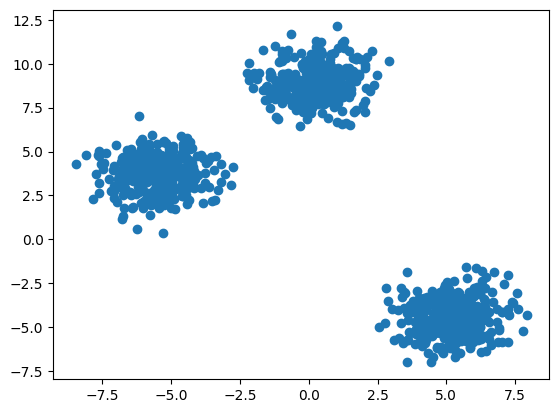

In [97]:
plt.scatter(X[:, 0], X[:, 1])

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42) 

In [99]:
from sklearn.cluster import KMeans

#elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++' )
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [100]:
wcss

[10493.44012300168,
 2385.892466522273,
 392.2891938313154,
 335.23332113752235,
 292.66317907331273,
 258.5510350318907,
 228.23685241867204,
 191.64305686972077,
 169.90777139584233,
 152.25640736182555]

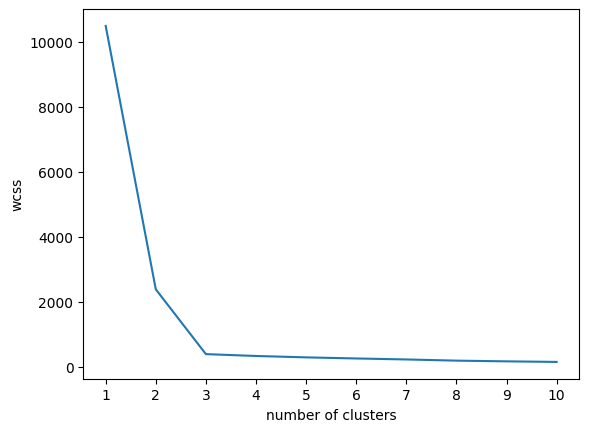

In [101]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show() 

In [102]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [103]:
y_labels = kmeans.fit_predict(X_train)

In [104]:
y_test_label = kmeans.predict(X_test)

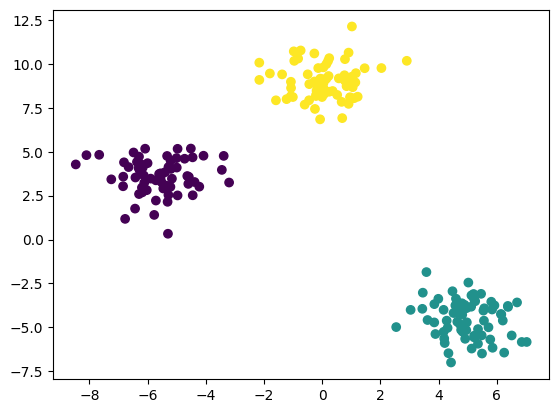

In [105]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

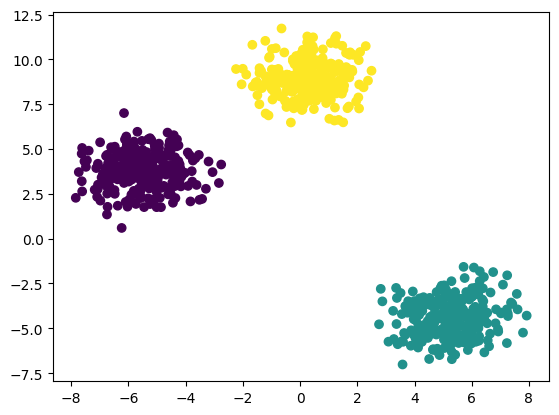

In [106]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_label)

In [107]:
!pip install kneed

In [109]:
from kneed import KneeLocator
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print(knee.elbow)

3


In [111]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)
    

In [115]:
silhouette_coefficients

[np.float64(0.7271180641361482),
 np.float64(0.8080861204758343),
 np.float64(0.6482503584311543),
 np.float64(0.633033365759164),
 np.float64(0.5059357871454325),
 np.float64(0.4380511732980314),
 np.float64(0.3489093206447427),
 np.float64(0.3439875111781132),
 np.float64(0.34151811609605687)]

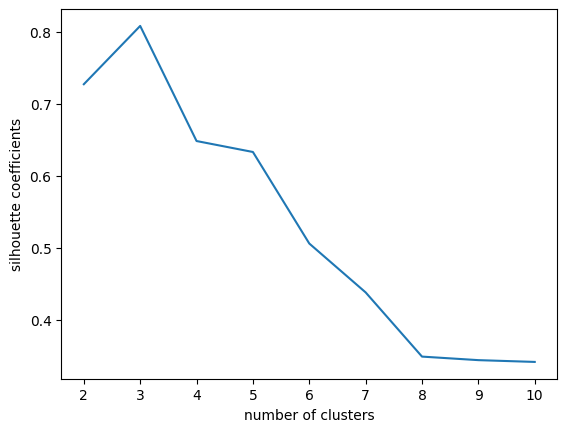

In [116]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("number of clusters")
plt.ylabel("silhouette coefficients")
plt.show()